In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

Fontconfig warning: ignoring UTF-8: not a valid region tag


['/System/Library/Fonts/Supplemental/NotoSansOsage-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Apple Chancery.ttf',
 '/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf',
 '/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXVarBol.otf',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Georgia Italic.ttf',
 '/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Times N

# Gender gap by position

In [3]:
df3 = pd.read_csv("HRDataset_v14.csv")

In [4]:
df3["Sex"] = df3["Sex"].str.replace(" ","")

## Variables

In [5]:
salaries_by_group = pd.pivot_table(data = df3, 
                                   values = 'Salary',
                                   columns = 'Position', index='Sex',
                                   aggfunc = np.mean)
salaries_by_group

Position,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,...,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
Sex,,,,,,,,,,,,,,,,,,,,,
F,63000.0,52280.0,63793.5,95920.000000,NaN,220450.0,90909.666667,NaN,150290.0,107124.75,...,56081.578313,65397.891892,67364.0,81584.0,NaN,96906.166667,NaN,102859.0,100031.0,96127.000000
M,63761.5,NaN,65843.8,95313.333333,110929.0,NaN,89199.750000,88527.0,NaN,113999.00,...,54667.425926,63956.700000,72992.0,86412.0,93046.0,96438.750000,77692.0,NaN,104437.0,91033.333333


In [6]:
count_by_group = pd.pivot_table(data = df3, 
                                   values = 'EmpID',
                                   columns = 'Position', index='Sex',
                                   aggfunc = len)
count_by_group

Position,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,...,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
Sex,,,,,,,,,,,,,,,,,,,,,
F,1.0,3.0,12.0,1.0,NaN,1.0,3.0,NaN,1.0,4.0,...,83.0,37.0,2.0,1.0,NaN,6.0,NaN,2.0,1.0,2.0
M,2.0,NaN,15.0,3.0,1.0,NaN,4.0,1.0,NaN,1.0,...,54.0,20.0,1.0,2.0,1.0,4.0,1.0,NaN,1.0,3.0


In [7]:
differences = (salaries_by_group.loc['F'] - salaries_by_group.loc['M'])*100/salaries_by_group.loc['M']

In [8]:
labels  = differences.sort_values().index

In [9]:
percent_labels = count_by_group[labels].iloc[0]*100 \
                /(count_by_group[labels].iloc[0] + count_by_group[labels].iloc[1])

### Negative differences

In [10]:
df6 = pd.DataFrame(differences)
df6.reset_index(drop=False,inplace=True)
df6 = df6.rename(columns={0: "Meanpercent"})
df6.dropna(inplace=True)
df6.drop(df6[df6['Meanpercent'] > 0].index, inplace = True)
df6.sort_values(by=['Meanpercent'])

,Position,Meanpercent
18,Network Engineer,-24.259073
24,Sales Manager,-7.710434
9,Database Administrator,-6.030097
25,Senior BI Developer,-5.587187
21,Production Manager,-5.332150
30,Sr. DBA,-4.218811
2,Area Sales Manager,-3.113885
17,IT Support,-2.051825
0,Accountant I,-1.194294


### Positive differences

In [11]:
df5 = pd.DataFrame(differences)
df5.reset_index(drop=False,inplace=True)
df5 = df5.rename(columns={0: "Meanpercent"})
df5.dropna(inplace=True)
df5.drop(df5[df5['Meanpercent'] < 0].index, inplace = True)
df5.dropna(inplace=True)
df5.sort_values(by=['Meanpercent'])

,Position,Meanpercent
27,Software Engineer,0.484677
3,BI Developer,0.636497
6,Data Analyst,1.916952
23,Production Technician II,2.253387
22,Production Technician I,2.586828
31,Sr. Network Engineer,5.595386


### Female representation

In [12]:
df7 = pd.DataFrame(percent_labels)
df7.reset_index(drop=False,inplace=True)
df7 = df7.rename(columns={0: "Femalerepresentaion"})
df7.dropna(inplace=True)

In [13]:
df7

,Position,Femalerepresentaion
0,Network Engineer,40.000000
1,Sales Manager,66.666667
2,Database Administrator,80.000000
3,Senior BI Developer,33.333333
4,Production Manager,42.857143
5,Sr. DBA,50.000000
6,Area Sales Manager,44.444444
7,IT Support,62.500000
8,Accountant I,33.333333
9,Software Engineer,60.000000


# Density

In [14]:
df = pd.read_csv("HRDataset_v14.csv")

In [15]:
df["Sex"] = df["Sex"].str.replace(" ","")

In [16]:
df1 = df[[ "EmpID", "Sex", "Salary"]]
#pivot1 = pd.pivot_table(data=df1, index=['EmpID'], columns=['Sex'], values='Salary').reset_index()
pivot1 = df1.pivot(columns = 'Sex',values = 'Salary')

In [17]:
pivot1

Sex,F,M
0,NaN,62506.0
1,NaN,104437.0
2,64955.0,NaN
3,64991.0,NaN
4,50825.0,NaN
...,...,...
306,NaN,65893.0
307,48513.0,NaN
308,220450.0,NaN
309,89292.0,NaN


# Racial gap pay

In [18]:
df2 = pd.read_csv("RaceandAgeroup.csv")

In [19]:
df2["Sex"] = df2["Sex"].str.replace(" ","")

In [20]:
Race_Sex = pd.DataFrame(df2.groupby(['Racegroup', 'Sex']).agg({'Salary': ['mean']}))
Race_Sex.rename(columns={"Salary": "SalaryMean"}, inplace = True)
pivot = pd.pivot_table(data=Race_Sex, index=['Racegroup'], columns=['Sex'], values='SalaryMean')
pivot.rename(columns={"mean": "SalaryMean"}, inplace = True)

In [21]:
pivot

SalaryMean              
Sex                                   F             M
Racegroup                                            
Asian                      67520.117647  69939.416667
Black or African American  68583.809524  84387.733333
Hispanic                   78074.142857  70392.833333
Other                      59638.428571  63685.666667
White                      66323.712766  65588.770270

# All Chart

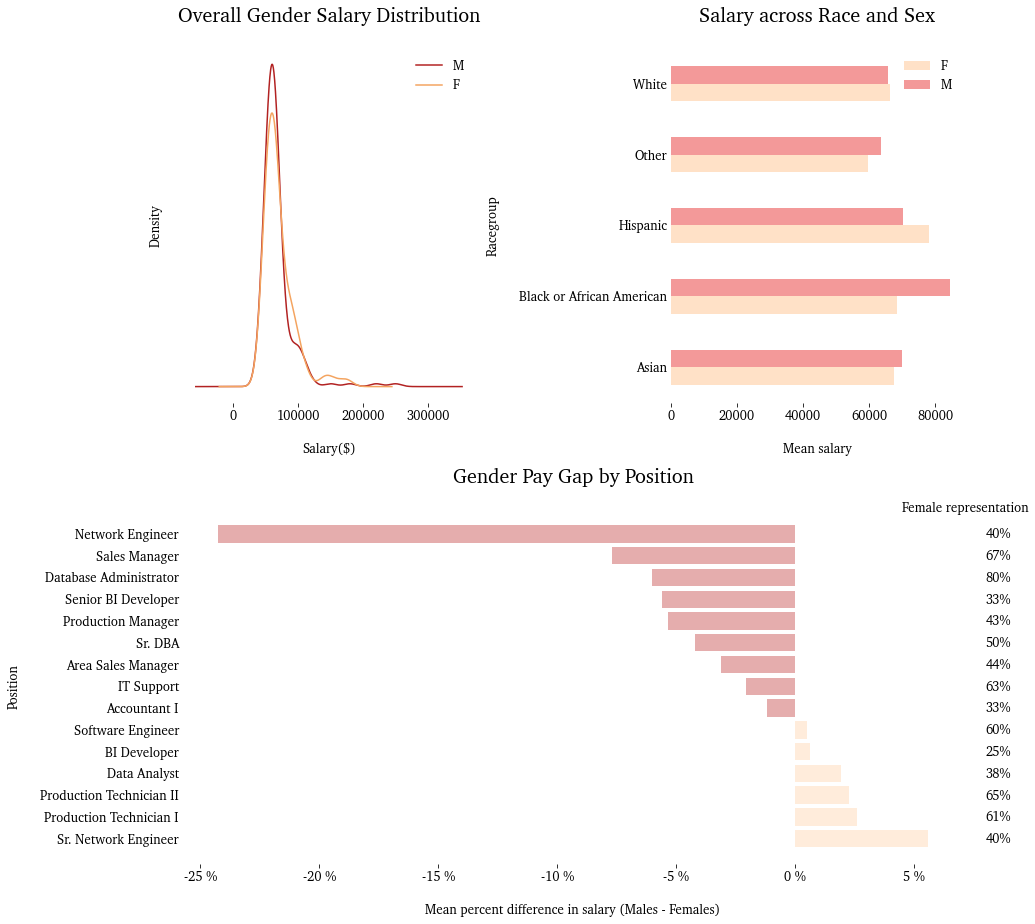

In [29]:
fig = plt.figure(figsize=(14, 15))
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.3, wspace=4)

## density chart
ax0 = fig.add_subplot(gs[0, :2])

## Racial pay gap
ax1 = fig.add_subplot(gs[0, 2:])

## gender pay gap by pos
ax2 = fig.add_subplot(gs[1, :])
#----------------------------------------------------------------------------------------------------
## density chart
# frame off
ax0.set_frame_on(False) 

# change ticks font style
for tick0 in ax0.get_xticklabels():
    tick0.set_fontname("Charter")
for tick0 in ax0.get_yticklabels():
    tick0.set_fontname("Charter")

# hide y ticks
ax0.set_yticks([])

# for label and title
ax0.set_title("Overall Gender Salary Distribution", fontfamily = 'Charter', size=20, pad=26)

# axis labels
ax0.set_xlabel("Salary($)", fontfamily = 'Charter', size=13, labelpad=20)
ax0.set_ylabel("Density of employees", fontfamily = 'Charter', size=13, labelpad=20)

#tick size
ax0.tick_params(axis='both', which='major', labelsize=13)

# plot 
pivot1.plot(ax =ax0, kind = 'density', color = ['firebrick',"sandybrown"])

# legend
ax0.legend(labels = ['M',"F"], frameon=False, prop={'family': 'Charter',"size": 13})

#----------------------------------------------------------------------------------------------------
## Racial pay gap

# frame off
ax1.set_frame_on(False) 

# change ticks font style
for tick1 in ax1.get_xticklabels():
    tick1.set_fontname("Charter")
for tick1 in ax1.get_yticklabels():
    tick1.set_fontname("Charter")


# hide yticks
ax1.tick_params(axis=u'y', which=u'both',length=0)

# for label and title
ax1.set_title("Salary across Race and Sex", fontfamily = 'Charter', size=20, pad=26)

# axis labels
ax1.set_xlabel("Mean salary", fontfamily = 'Charter', size=13, labelpad=20)
ax1.set_ylabel("Race group", fontfamily = 'Charter', size=13, labelpad=20)

# ticks size
ax1.tick_params(axis='both', which='major', labelsize=13)

# plot
pivot.plot.barh(ax = ax1, color =['peachpuff', 'lightcoral'],rot=0, alpha=0.8)

# legend
ax1.legend(labels = ['F',"M"], frameon=False, loc = "best", prop={
               'family': 'Charter',"size": 13})

#----------------------------------------------------------------------------------------------------
## gender pay gap by pos

# variables
df6_sorted = df6.sort_values('Meanpercent',ascending = False)
df5_sorted = df5.sort_values('Meanpercent',ascending = False)

# BG color
ax2.set_facecolor('white')

# frame off
ax2.set_frame_on(False) 

# remove grid line
ax2.grid(False)


# Title of Bar Chart
ax2.set_title('Gender Pay Gap by Position', fontdict={'size': 20}, fontfamily = 'Charter', pad=26)

# y label
ax2.set_ylabel('Position',fontdict={'size': 13}, fontfamily = 'Charter',labelpad=20)

# x label
ax2.set_xlabel('Mean percent difference in salary (Males - Females)',
              fontfamily = 'Charter',fontdict={'size': 13}, labelpad=20)

# change the fontsyle of x-ticks and y-ticks
for tick2 in ax2.get_xticklabels():
    tick2.set_fontname("Charter")
for tick2 in ax2.get_yticklabels():
    tick2.set_fontname("Charter")

# change the size of x-ticks and y-ticks
ax2.tick_params(axis='both', which='major', labelsize=13)

# put % on x-ticks
ax2.xaxis.set_major_formatter('{x:1.0f} %')

# hide yticks
ax2.tick_params(axis=u'y', which=u'both',length=0)

# add text (female representation)
ax2.text(4.5, 15, "Female representation", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 13.8, "40%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 12.8, "67%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 11.8, "80%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 10.8, "33%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 9.8, "43%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 8.8, "50%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 7.8, "44%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 6.8, "63%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 5.8, "33%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 4.8, "60%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 3.8, "25%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 2.8, "38%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 1.8, "65%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, 0.8, "61%", fontsize = 13, fontfamily = 'Charter')
ax2.text(8, -0.2, "40%", fontsize = 13, fontfamily = 'Charter')

# plot
ax2.barh("Position", "Meanpercent", data=df5_sorted, color="peachpuff", alpha=0.5)
ax2.barh("Position", "Meanpercent", data=df6_sorted, color="indianred", alpha=0.5)


plt.savefig('5.jpg',bbox_inches='tight',dpi=250)

plt.show()